In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
# Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn import decomposition, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
from Hackaton.python.read_pics import get_pics_from_file

In [107]:
pics_name = os.listdir('Hackaton/data/')
pics_name.remove('pics_LOGINMDP.bin')


## Transform to panda dataset


In [108]:
data = dict()
for i in range(17):
    data[str(i)] = []
data["name"] = []

for pic_name in pics_name:
    pics_key, info = get_pics_from_file(f'Hackaton/data/{pic_name}')
    for pics in pics_key:
        for i, pic in enumerate(pics):
            data[str(i)].append(pic)
        data["name"].append(pic_name)

df = pd.DataFrame(data)
df.head(6)


Ouverture du fichier de pics Hackaton/data/pics_0.bin
Ouverture du fichier de pics Hackaton/data/pics_1.bin
Ouverture du fichier de pics Hackaton/data/pics_2.bin
Ouverture du fichier de pics Hackaton/data/pics_3.bin
Ouverture du fichier de pics Hackaton/data/pics_4.bin
Ouverture du fichier de pics Hackaton/data/pics_5.bin
Ouverture du fichier de pics Hackaton/data/pics_6.bin
Ouverture du fichier de pics Hackaton/data/pics_7.bin
Ouverture du fichier de pics Hackaton/data/pics_8.bin
Ouverture du fichier de pics Hackaton/data/pics_9.bin
Ouverture du fichier de pics Hackaton/data/pics_A.bin
Ouverture du fichier de pics Hackaton/data/pics_B.bin
Ouverture du fichier de pics Hackaton/data/pics_C.bin
Ouverture du fichier de pics Hackaton/data/pics_CTRL.bin
Ouverture du fichier de pics Hackaton/data/pics_D.bin
Ouverture du fichier de pics Hackaton/data/pics_E.bin
Ouverture du fichier de pics Hackaton/data/pics_ENTER.bin
Ouverture du fichier de pics Hackaton/data/pics_F.bin
Ouverture du fichier 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,name
0,0.968018,1.348877,0.230713,0.941162,0.811157,0.838623,0.671997,0.506592,0.765991,0.277100,0.477295,0.569458,0.371704,0.802002,0.634155,0.509033,0.567017,pics_0.bin
1,0.754395,1.149902,0.137939,1.062012,0.589600,0.745239,0.734253,0.904541,0.669556,0.085449,0.650635,0.791626,0.339355,0.538330,0.848999,0.687256,0.356445,pics_0.bin
2,0.765991,1.292725,0.225830,1.033325,0.750122,0.550537,0.760498,0.451660,0.767822,0.393066,0.463867,0.661011,0.431519,0.609741,0.845947,0.637207,0.558472,pics_0.bin
3,0.573730,0.880127,1.459351,0.375977,1.184692,0.697021,0.614014,0.910645,1.012573,0.670776,0.264282,0.765991,0.631714,0.355835,0.656128,1.054688,0.786133,pics_0.bin
4,0.428467,0.922241,1.361694,0.296631,1.135254,0.856934,0.629883,0.707397,0.797729,0.759888,0.233154,0.765991,0.765991,0.623169,0.587158,0.908813,0.946045,pics_0.bin
5,0.908203,1.404419,0.296021,0.689697,0.859375,0.614014,0.723877,0.817871,0.854492,0.184326,0.659180,0.805054,0.373535,0.736084,0.798340,0.849609,0.279541,pics_0.bin


In [109]:
X = df.iloc[:, :-1]
y = df.iloc[:, 17]

print("X shape = " + str(X.shape))
print("y shape = " + str(y.shape))

X shape = (351612, 17)
y shape = (351612,)


In [110]:
# List of name (X)


In [111]:
# Normalize
normalizer = Normalizer()
X = normalizer.fit_transform(X)

# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)






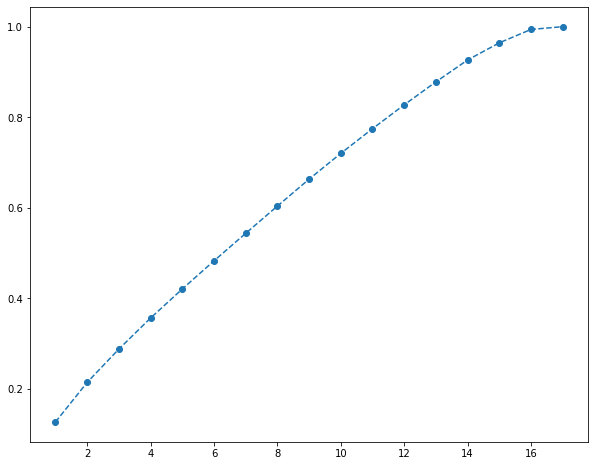

In [112]:
pca = decomposition.PCA()
pca.fit(X)
plt.figure(figsize=(10,8))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')

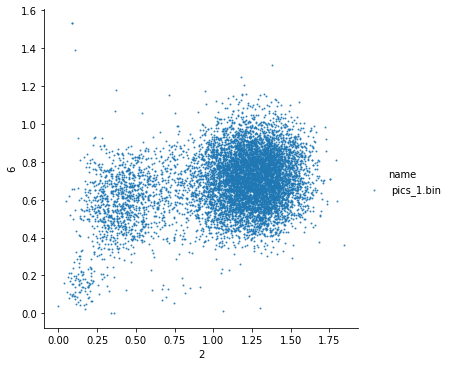

In [113]:
minidf = df.loc[(df["name"] == "pics_1.bin")]
sns.lmplot(x="2", y="6",
  data=minidf,
  fit_reg=False,
  hue='name', # color by cluster
  legend=True,
  scatter_kws={"s": 1}) # specify the point size

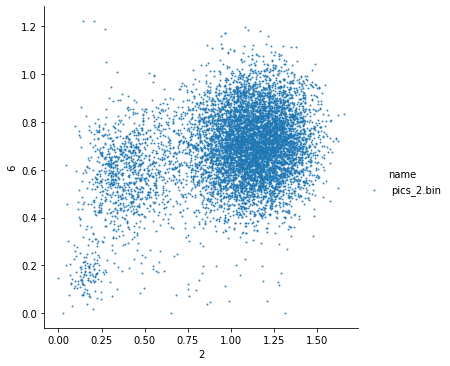

In [114]:
minidf = df.loc[(df["name"] == "pics_2.bin")]
sns.lmplot(x="2", y="6",
  data=minidf,
  fit_reg=False,
  hue='name', # color by cluster
  legend=True,
  scatter_kws={"s": 1}) # specify the point size


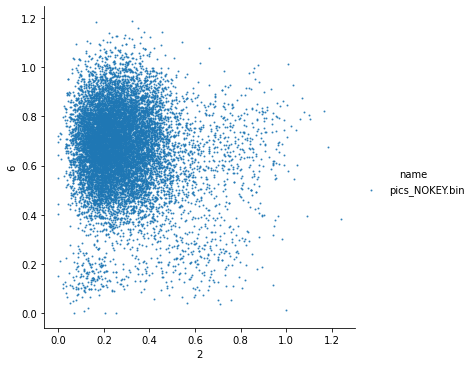

In [115]:
minidf = df.loc[(df["name"] == "pics_NOKEY.bin")]
sns.lmplot(x="2", y="6",
  data=minidf,
  fit_reg=False,
  hue='name', # color by cluster
  legend=True,
  scatter_kws={"s": 1}) # specify the point size


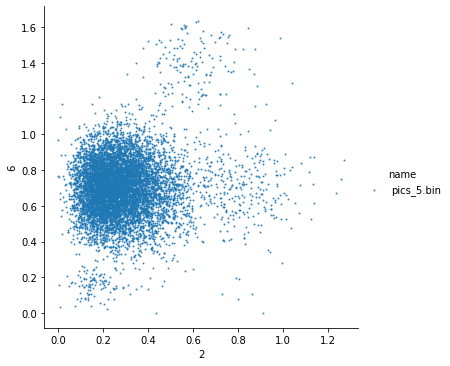

In [116]:
minidf = df.loc[(df["name"] == "pics_5.bin")]
sns.lmplot(x="2", y="6",
  data=minidf,
  fit_reg=False,
  hue='name', # color by cluster
  legend=True,
  scatter_kws={"s": 1}) # specify the point size


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True)

In [118]:
# KNN
K = 5

# Create and fit model
neigh = KNeighborsClassifier(n_neighbors=K)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [119]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X_train, y_train)


NearestCentroid()

In [120]:
# Test
y_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.40828166770945906
[[312   7  15 ...   0   0   0]
 [ 17  47  76 ...   0   0   0]
 [ 23  65 117 ...   0   0   0]
 ...
 [  2   2   4 ... 109   0 203]
 [  0   1   0 ...   0 103   0]
 [  3   2   8 ...  77   0 333]]
                precision    recall  f1-score   support

    pics_0.bin       0.38      0.33      0.35       941
    pics_1.bin       0.17      0.06      0.08       852
    pics_2.bin       0.24      0.14      0.18       808
    pics_3.bin       0.28      0.18      0.22       831
    pics_4.bin       0.26      0.23      0.25      1115
    pics_5.bin       0.28      0.14      0.19       850
    pics_6.bin       0.21      0.20      0.20       779
    pics_7.bin       0.27      0.20      0.23       815
    pics_8.bin       0.28      0.24      0.26       816
    pics_9.bin       0.33      0.58      0.42       786
    pics_A.bin       0.29      0.16      0.21       763
    pics_B.bin       0.26      0.26      0.26       750
    pics_C.bin       0.46      0.78      0.58       824
 pi

In [121]:
# Test
y_pred = neigh.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.500654115238041
[[424   3   1 ...   0   0   0]
 [  1 214 143 ...   0   0   0]
 [  1 218 206 ...   0   0   0]
 ...
 [  0   1   0 ... 303   0 212]
 [  0   1   0 ...   0 169   0]
 [  0   2   2 ... 334   0 279]]
                precision    recall  f1-score   support

    pics_0.bin       0.61      0.45      0.52       941
    pics_1.bin       0.21      0.25      0.23       852
    pics_2.bin       0.26      0.25      0.26       808
    pics_3.bin       0.22      0.16      0.19       831
    pics_4.bin       0.30      0.24      0.27      1115
    pics_5.bin       0.28      0.36      0.32       850
    pics_6.bin       0.33      0.38      0.35       779
    pics_7.bin       0.31      0.32      0.31       815
    pics_8.bin       0.28      0.20      0.23       816
    pics_9.bin       0.44      0.39      0.41       786
    pics_A.bin       0.35      0.52      0.42       763
    pics_B.bin       0.29      0.41      0.34       750
    pics_C.bin       0.64      0.80      0.71       824
 pics

Text(0.5, 1.0, 'Normalized confusion matrix')

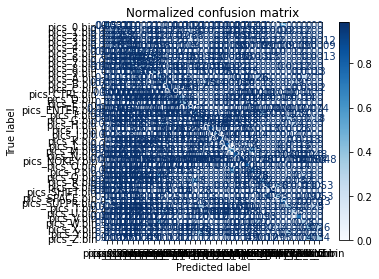

In [122]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(neigh, X_test, y_test,
                             cmap=plt.cm.Blues,
                             normalize='true')
disp.ax_.set_title('Normalized confusion matrix')

In [123]:
# Test
pics_key, info = get_pics_from_file(f'Hackaton/data/pics_LOGINMDP.bin')
predictions = []
predictions_proba = []
for pics in pics_key:
    to_predict = normalizer.transform(pics.reshape(1, -1))
    to_predict = scaler.transform(to_predict)
    key = neigh.predict(to_predict)[0]
    if key != 'pics_NOKEY.bin':
        predictions.append(key)
        predictions_proba.append(neigh.predict_proba(to_predict)[0])


Ouverture du fichier de pics Hackaton/data/pics_LOGINMDP.bin


In [124]:
for pic_name in pics_name:
    print(f'{pic_name} : {predictions.count(pic_name)}')

pics_0.bin : 309
pics_1.bin : 160
pics_2.bin : 114
pics_3.bin : 106
pics_4.bin : 97
pics_5.bin : 15
pics_6.bin : 11
pics_7.bin : 16
pics_8.bin : 17
pics_9.bin : 12
pics_A.bin : 201
pics_B.bin : 67
pics_C.bin : 95
pics_CTRL.bin : 502
pics_D.bin : 59
pics_E.bin : 41
pics_ENTER.bin : 171
pics_F.bin : 29
pics_G.bin : 76
pics_H.bin : 82
pics_I.bin : 63
pics_J.bin : 17
pics_K.bin : 180
pics_L.bin : 23
pics_M.bin : 53
pics_N.bin : 104
pics_NOKEY.bin : 0
pics_O.bin : 98
pics_P.bin : 39
pics_Q.bin : 101
pics_R.bin : 22
pics_S.bin : 4
pics_SHIFT.bin : 1854
pics_SPACE.bin : 2
pics_SUPPR.bin : 152
pics_T.bin : 92
pics_U.bin : 71
pics_V.bin : 2
pics_W.bin : 66
pics_X.bin : 26
pics_Y.bin : 53
pics_Z.bin : 26


In [125]:
reconstruct = res = list(filter('pics_NOKEY.bin'.__ne__, predictions))
print(reconstruct)

['pics_3.bin', 'pics_W.bin', 'pics_8.bin', 'pics_SHIFT.bin', 'pics_8.bin', 'pics_T.bin', 'pics_CTRL.bin', 'pics_M.bin', 'pics_F.bin', 'pics_U.bin', 'pics_Z.bin', 'pics_K.bin', 'pics_P.bin', 'pics_H.bin', 'pics_M.bin', 'pics_A.bin', 'pics_E.bin', 'pics_6.bin', 'pics_D.bin', 'pics_0.bin', 'pics_6.bin', 'pics_E.bin', 'pics_7.bin', 'pics_CTRL.bin', 'pics_T.bin', 'pics_8.bin', 'pics_H.bin', 'pics_B.bin', 'pics_P.bin', 'pics_A.bin', 'pics_A.bin', 'pics_CTRL.bin', 'pics_3.bin', 'pics_SPACE.bin', 'pics_F.bin', 'pics_T.bin', 'pics_4.bin', 'pics_P.bin', 'pics_0.bin', 'pics_9.bin', 'pics_CTRL.bin', 'pics_CTRL.bin', 'pics_R.bin', 'pics_H.bin', 'pics_I.bin', 'pics_7.bin', 'pics_K.bin', 'pics_SUPPR.bin', 'pics_A.bin', 'pics_H.bin', 'pics_CTRL.bin', 'pics_9.bin', 'pics_2.bin', 'pics_X.bin', 'pics_3.bin', 'pics_6.bin', 'pics_H.bin', 'pics_D.bin', 'pics_2.bin', 'pics_X.bin', 'pics_Z.bin', 'pics_T.bin', 'pics_M.bin', 'pics_CTRL.bin', 'pics_A.bin', 'pics_2.bin', 'pics_0.bin', 'pics_E.bin', 'pics_CTRL.bin

In [126]:
print(predictions)


['pics_3.bin', 'pics_W.bin', 'pics_8.bin', 'pics_SHIFT.bin', 'pics_8.bin', 'pics_T.bin', 'pics_CTRL.bin', 'pics_M.bin', 'pics_F.bin', 'pics_U.bin', 'pics_Z.bin', 'pics_K.bin', 'pics_P.bin', 'pics_H.bin', 'pics_M.bin', 'pics_A.bin', 'pics_E.bin', 'pics_6.bin', 'pics_D.bin', 'pics_0.bin', 'pics_6.bin', 'pics_E.bin', 'pics_7.bin', 'pics_CTRL.bin', 'pics_T.bin', 'pics_8.bin', 'pics_H.bin', 'pics_B.bin', 'pics_P.bin', 'pics_A.bin', 'pics_A.bin', 'pics_CTRL.bin', 'pics_3.bin', 'pics_SPACE.bin', 'pics_F.bin', 'pics_T.bin', 'pics_4.bin', 'pics_P.bin', 'pics_0.bin', 'pics_9.bin', 'pics_CTRL.bin', 'pics_CTRL.bin', 'pics_R.bin', 'pics_H.bin', 'pics_I.bin', 'pics_7.bin', 'pics_K.bin', 'pics_SUPPR.bin', 'pics_A.bin', 'pics_H.bin', 'pics_CTRL.bin', 'pics_9.bin', 'pics_2.bin', 'pics_X.bin', 'pics_3.bin', 'pics_6.bin', 'pics_H.bin', 'pics_D.bin', 'pics_2.bin', 'pics_X.bin', 'pics_Z.bin', 'pics_T.bin', 'pics_M.bin', 'pics_CTRL.bin', 'pics_A.bin', 'pics_2.bin', 'pics_0.bin', 'pics_E.bin', 'pics_CTRL.bin